In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [76]:
# Importing dataset from CSV file
income_data = pd.read_csv("income-dataset.csv")
income_data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [77]:
# Data Prep
income_data = income_data.drop(["Name"],axis="columns")
income_data.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


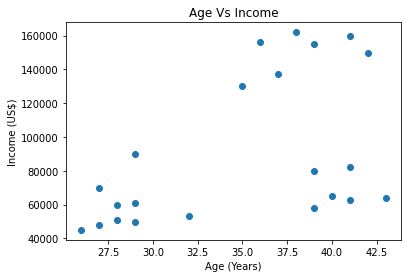

In [78]:
# Data Visualization : Scatter Plot
plt.scatter(income_data['Age'],income_data['Income($)'])
plt.title("Age Vs Income")
plt.xlabel("Age (Years)")
plt.ylabel("Income (US$)")
plt.show()

In [79]:
# Scaling Income for K Means Clustering
scaler = MinMaxScaler()
scaler.fit(income_data[['Income($)']])
income_data['Income(Scaled)'] = scaler.transform(income_data[['Income($)']])
income_data.head()

,Age,Income($),Income(Scaled)
0,27,70000,0.213675
1,29,90000,0.384615
2,29,61000,0.136752
3,28,60000,0.128205
4,42,150000,0.897436


In [80]:
# Scaling Age For Proper K Means Clustering
scaler.fit(income_data[['Age']])
income_data['Age(Scaled)'] = scaler.transform(income_data[['Age']])
income_data.head()

,Age,Income($),Income(Scaled),Age(Scaled)
0,27,70000,0.213675,0.058824
1,29,90000,0.384615,0.176471
2,29,61000,0.136752,0.176471
3,28,60000,0.128205,0.117647
4,42,150000,0.897436,0.941176


In [81]:
# Creating New DataFrame for scaled data
scaled_income_data = pd.DataFrame({'Age':income_data['Age(Scaled)'],'Income':income_data['Income(Scaled)']})
scaled_income_data.head()

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


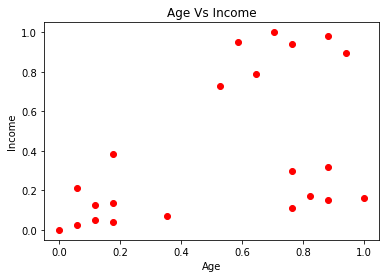

In [82]:
# Data Visualization : Scatter Plot
plt.scatter(scaled_income_data['Age'],scaled_income_data['Income'],color='red')
plt.title("Age Vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [83]:
# Performing K Means Clustering
kmp = KMeans(n_clusters=3)
kmp

KMeans(n_clusters=3)

In [84]:
# Training And Testing
predicted_clusters = kmp.fit_predict(scaled_income_data[['Age','Income']])
predicted_clusters

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [85]:
# Adding Predicted Clusters to DataFrame
scaled_income_data['Cluster'] = predicted_clusters
scaled_income_data.head()

,Age,Income,Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [86]:
# Creating Cluster DataFrames
# Cluster 0
c0 = scaled_income_data[scaled_income_data.Cluster==0]
c0.head()

,Age,Income,Cluster
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0


In [87]:
# Cluster 1
c1 = scaled_income_data[scaled_income_data.Cluster==1]
c1.head()

,Age,Income,Cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
11,0.000000,0.000000,1


In [88]:
# Cluster 2
c2 = scaled_income_data[scaled_income_data.Cluster==2]
c2.head()

,Age,Income,Cluster
16,0.823529,0.170940,2
17,0.882353,0.153846,2
18,1.000000,0.162393,2
19,0.764706,0.299145,2
20,0.882353,0.316239,2


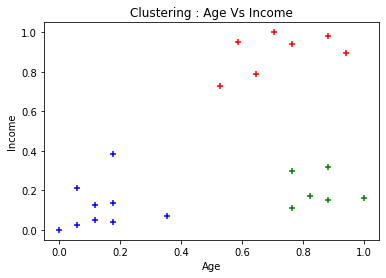

In [89]:
# Clusters Visualization : Scatter Plot
plt.scatter(c0['Age'],c0['Income'],marker='+',color='red')
plt.scatter(c1['Age'],c1['Income'],marker='+',color='blue')
plt.scatter(c2['Age'],c2['Income'],marker='+',color='green')
plt.title("Clustering : Age Vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [99]:
# Elbow Plot : For finding number of clusters
k_range = range(1,10)
sum_square_error = []

for k  in k_range:
    kmc = KMeans(n_clusters=k)
    kmc.fit_predict(scaled_income_data[['Age','Income']])
    sum_square_error.append(kmc.inertia_)

sum_square_error

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2664030124668416,
 0.22020960864009395,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562]

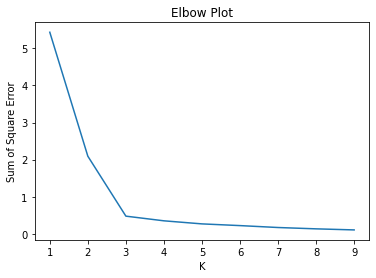

In [100]:
# Visualization : Line Chart
plt.plot(k_range,sum_square_error)
plt.title("Elbow Plot")
plt.xlabel("K")
plt.ylabel("Sum of Square Error")
plt.show()

In [101]:
# Exporting Results
scaled_income_data.to_csv("results.csv",index=False)

In [102]:
# Saving Model to Binary File
import joblib
joblib.dump(kmp,"income-prediction-model-kmc")

['income-prediction-model-kmc']